question: Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years                                                                   
Administration -- spend on administration in the past few years                                                                 
Marketing Spend -- spend on Marketing in the past few years                                                                     
State -- states from which data is collected                                                                                   
Profit -- profit of each state in the past few years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Dropping the categorical variable State

In [5]:
data1 = data.drop(columns=['State'])
data1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Rename the columns

In [6]:
data2=data1.rename({'R&D Spend':'RD','Marketing Spend':'MS'},axis=1)

In [7]:
data2.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Scatterplot between variables 

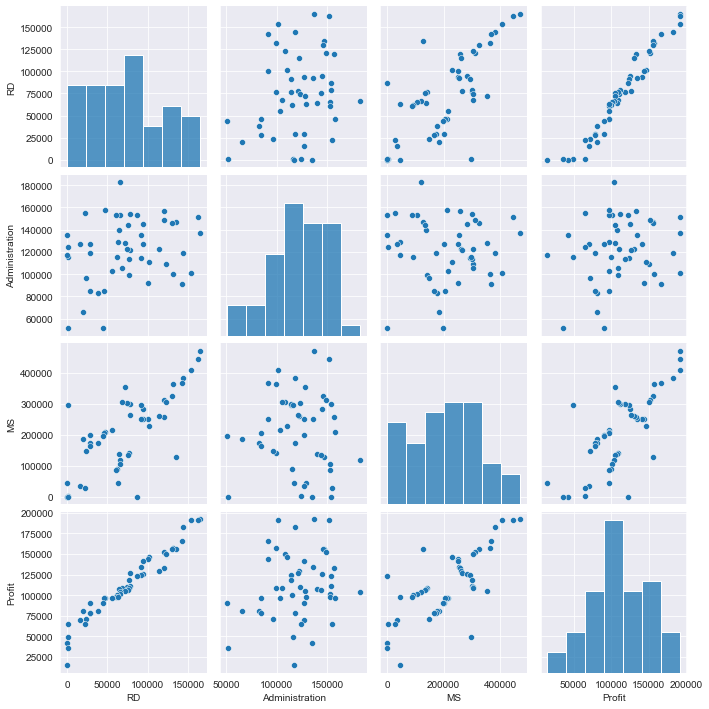

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data2)

### Model Building

In [9]:
model = smf.ols('Profit~RD+Administration+MS',data=data2).fit()

In [10]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [11]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [13]:
data3 = data2.copy()

In [14]:
data3['Predicted_values']= model.predict(data3)
data3['Errors'] = model.resid
data3

,RD,Administration,MS,Profit,Predicted_values,Errors
0,165349.20,136897.80,471784.10,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,-5124.724110


In [15]:
a=model.pvalues
print(a)

Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


### Model Accuracy

In [16]:
(model.rsquared,model.rsquared_adj,model.aic)

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

This model is able to predict 95 % accurate values.

## Model validation

### Calculating VIF ----- to check multicollinearity

In [17]:
rsq_RD = smf.ols('RD~Administration+MS',data=data2).fit().rsquared  
vif_RD = 1/(1-rsq_RD)

rsq_ad = smf.ols('Administration~RD+MS',data=data2).fit().rsquared  
vif_ad = 1/(1-rsq_ad) 

rsq_MS = smf.ols('MS~RD+Administration',data=data2).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 

#rsq_SC = smf.ols('SC~RD+Administration+MS+SF+SN',data=data2).fit().rsquared  
#vif_SC = 1/(1-rsq_SC)

#rsq_SF = smf.ols('SF~RD+Administration+MS+SC+SN',data=data2).fit().rsquared  
#vif_SF = 1/(1-rsq_SF)

#rsq_SN = smf.ols('SN~RD+Administration+MS+SC+SF',data=data2).fit().rsquared  
#vif_SN = 1/(1-rsq_SN)

# Storing vif values in a data frame
d1 = {'Variables':['RD','Adminitration','MS'],'VIF':[vif_RD,vif_ad,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Adminitration,1.175091
2,MS,2.326773


No variable is involved in multicollinearity

## Residual Analysis

### Test for Normality for Residuals (Q-Q Plot)

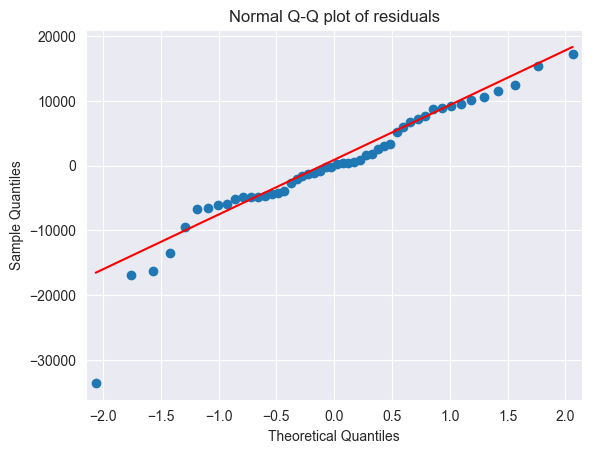

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

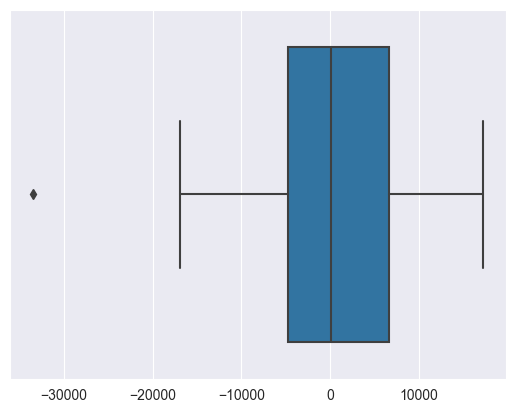

In [19]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Density'>

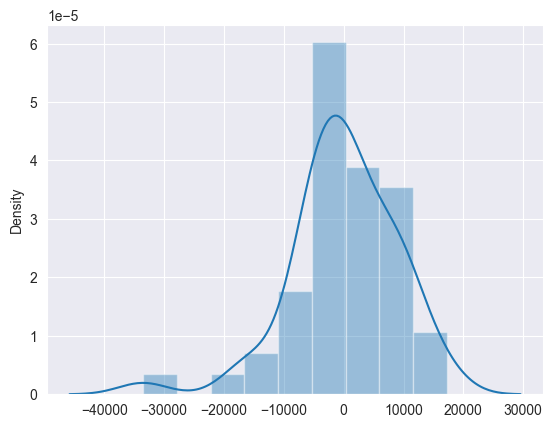

In [20]:
sns.distplot(model.resid)

- From the above graphs we can see there is one outlier.

## Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

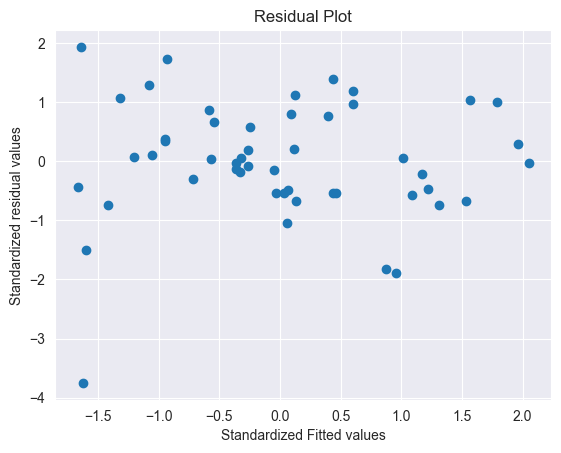

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

- From this residual plot we can see that the errors are independent of fitted values, so this is a good model

### Residual Vs Regressors

eval_env: 1


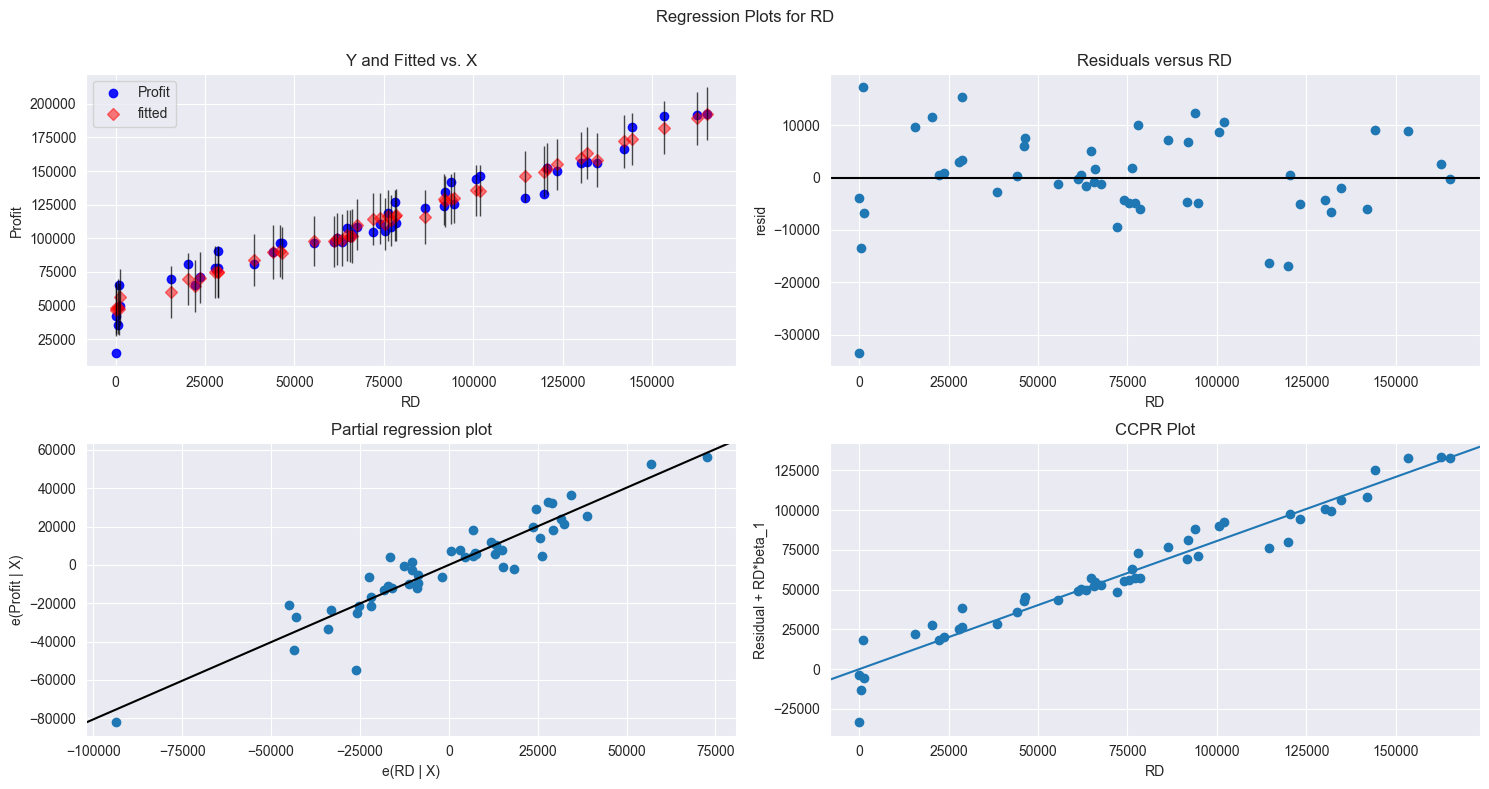

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


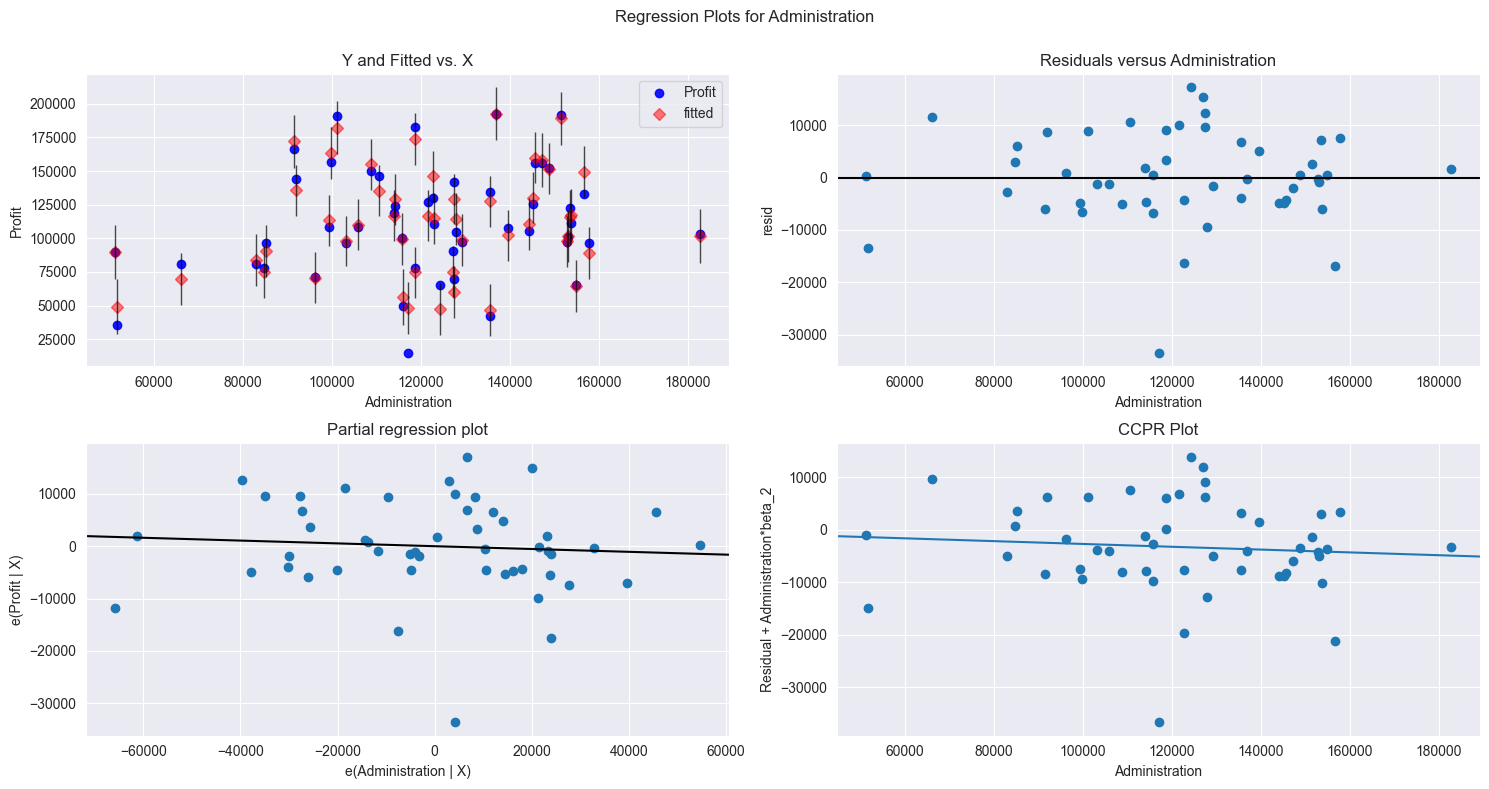

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


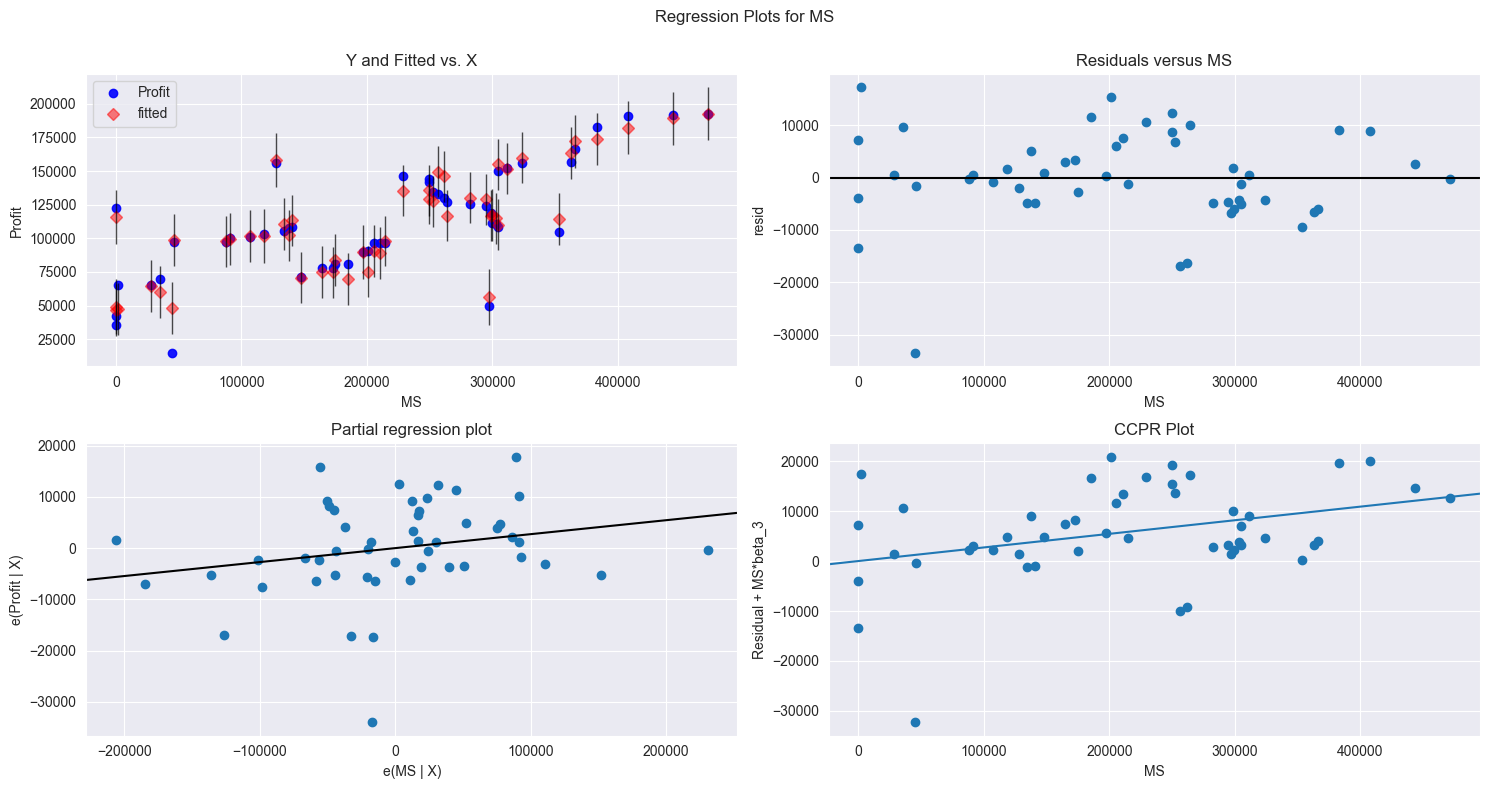

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

## Model deletion diagnostics

### Deleting outliers

#### Cook's Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

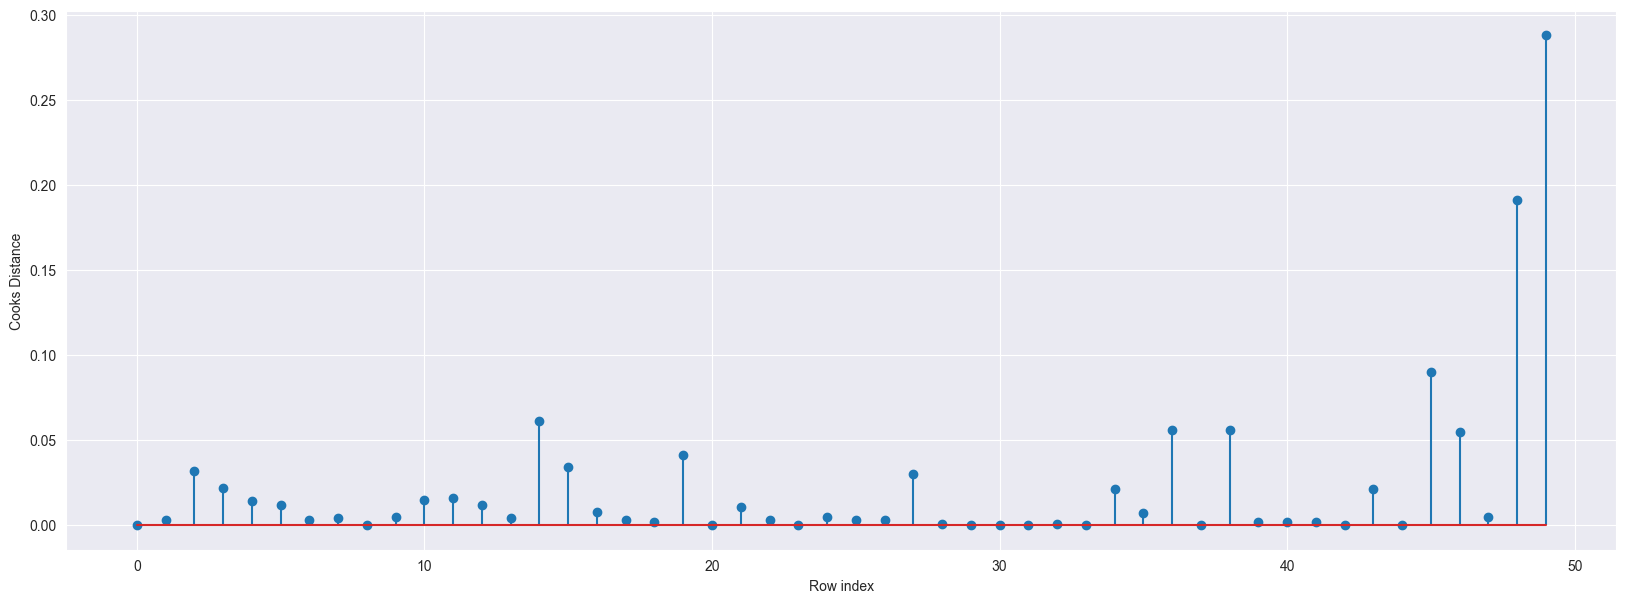

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

#### High Influence points

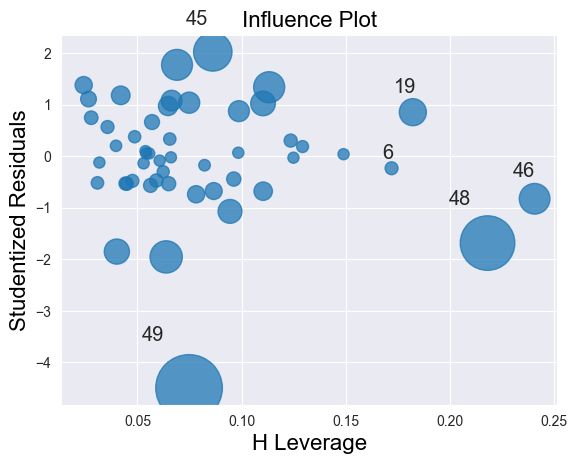

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k=data2.shape[1]
n=data2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

### Improving the model

In [35]:
#Discarding the data points which are influencers and reasign the row number (reset_index())
data4 = data2.drop(data2.index[49],axis=0).reset_index()

In [36]:
data4.shape

(49, 5)

In [37]:
data4

,index,RD,Administration,MS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [39]:
data5 = data4.drop(['index'],axis = 1)
data5

,RD,Administration,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Building the model

In [40]:
final_model=smf.ols('Profit~RD+Administration+MS',data=data5).fit()

### Final Model accuracy

In [41]:
final_model.rsquared,final_model.rsquared_adj,final_model.aic

(0.9613162435129847, 0.9587373264138503, 1020.5652974526367)

## Final model has 96.13% accuracy

<AxesSubplot:>

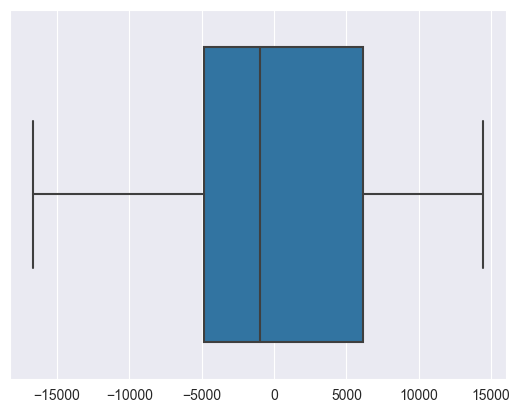

In [42]:
sns.boxplot(final_model.resid)

<AxesSubplot:ylabel='Density'>

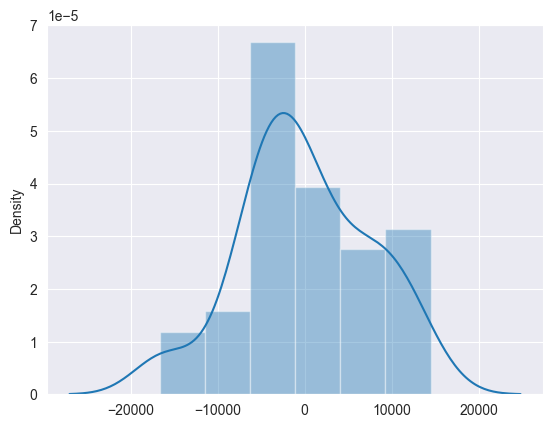

In [43]:
sns.distplot(final_model.resid)

- No more outilers, so we can consider this model as our filnal model. 

### Prediction for new data points

In [44]:
new_data=pd.DataFrame({'RD':162597,'Administration':152597,'MS':127716.59},index=[1])

In [45]:
new_data['Profit_prediction']=final_model.predict(new_data)
final_model.predict(new_data)

1    179531.085143
dtype: float64

In [46]:
new_data

,RD,Administration,MS,Profit_prediction
1,162597,152597,127716.59,179531.085143


- No more outilers, so we can consider this model as our filnal model. 

In [47]:
data6 = pd.DataFrame({'Model':['1st_Model','Final_model'],'R-squared value(in %)':[95,96.13]})

In [48]:
data6

,Model,R-squared value(in %)
0,1st_Model,95.00
1,Final_model,96.13
